# Graph Recommendation System


## Installing all dependencies

In [2]:
import torch

In [3]:
# Install required packages
import os

os.environ['TORCH'] = torch.__version__
!pip install pyg-lib -f https://data.pyg.org/whl/nightly/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

!pip install sentence_transformers

Looking in links: https://data.pyg.org/whl/nightly/torch-2.2.1+cu121.html
ERROR: Could not find a version that satisfies the requirement pyg-lib (from versions: none)
ERROR: No matching distribution found for pyg-lib
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-l5lk7vbn
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-l5lk7vbn
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 12f6dcb786f5de9c5cc9a85f32df34a7958b0a04
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.6.0-py3-none-any.whl size=1100902 sha256=6ab6502bc302a14e9b2a356c15c0afc33a7e82a83fcea3bdd599c43b20fe39ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-tpwp9fi1/wheels/d3/78/eb/9e26525b948d19533f1688fb6c209cec8a0ba793d39b49ae8f
Successfully bui

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


## Loading the Dataset (MovieLens)


In [5]:
from torch_geometric.data import download_url, extract_zip
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/CS247 Project/ml-100k"

Mounted at /content/drive


In [7]:
# Loading the movies data
movies_df = pd.read_csv("/content/drive/MyDrive/CS247 Project/movies_with_plots.csv")

display(movies_df)

,Unnamed: 0,movie id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_plot,genres,processed_plot,keywords
0,0,1,Toy Story (1995),1995,0,0,0,1,1,1,...,0,0,0,0,0,0,"Sentient when humans are not around, a group o...",Animation Children's Comedy,sentient human around group toy prepar move ne...,1995 Animation Children's Comedy sentient huma...
1,1,2,GoldenEye (1995),1995,0,1,1,0,0,0,...,0,0,0,1,0,0,"In 1986, MI6 agents James Bond and Alec Trevel...",Action Adventure Thriller,agent jame bond alec trevelyan infiltr soviet ...,1995 Action Adventure Thriller agent jame bond...
2,2,3,Four Rooms (1995),1995,0,0,0,0,0,0,...,0,0,0,1,0,0,"On New Year's Eve, bellhop Sam (Marc Lawrence)...",Thriller,new year eve bellhop sam marc lawrenc hotel mo...,1995 Thriller new year eve bellhop sam marc la...
3,3,4,Get Shorty (1995),1995,0,1,0,0,0,1,...,0,0,0,0,0,0,"Ernesto ""Chili"" Palmer is a Miami-based loan s...",Action Comedy Drama,ernesto chili palmer loan shark movi buff leat...,1995 Action Comedy Drama ernesto chili palmer ...
4,4,5,Copycat (1995),1995,0,0,0,0,0,0,...,0,0,0,1,0,0,After giving a guest lecture on criminal psych...,Crime Drama Thriller,give guest lectur crimin psycholog local unive...,1995 Crime Drama Thriller give guest lectur cr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1367,1367,1675,"Sunchaser, The (1996)",1996,0,0,0,0,0,0,...,0,0,0,0,0,0,"Brandon ""Blue"" Monroe, a 16-year-old half-Nava...",Drama,brandon blue monro gang member east serv time ...,1996 Drama brandon blue monro gang member east...
1368,1368,1676,"War at Home, The (1996)",1996,0,0,0,0,0,0,...,0,0,0,0,0,0,Jeremy Collier is a returning Vietnam War hero...,Drama,jeremi collier return vietnam war hero whose e...,1996 Drama jeremi collier return vietnam war h...
1369,1369,1678,Mat' i syn (1997),1998,0,0,0,0,0,0,...,0,0,0,0,0,0,"The film opens on two human forms, which soon ...",Drama,film open two human form soon reveal young man...,1998 Drama film open two human form soon revea...
1370,1370,1679,B. Monkey (1998),1998,0,0,0,0,0,0,...,0,1,0,1,0,0,Alan (Jared Harris) is a schoolteacher in Lond...,Romance Thriller,alan jare harri schoolteach london also moonli...,1998 Romance Thriller alan jare harri schoolte...


In [8]:
movies_df = movies_df.drop(['unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western','processed_plot', 'genres', 'release date'], axis = 1)

In [9]:
movies_df

,Unnamed: 0,movie id,movie title,movie_plot,keywords
0,0,1,Toy Story (1995),"Sentient when humans are not around, a group o...",1995 Animation Children's Comedy sentient huma...
1,1,2,GoldenEye (1995),"In 1986, MI6 agents James Bond and Alec Trevel...",1995 Action Adventure Thriller agent jame bond...
2,2,3,Four Rooms (1995),"On New Year's Eve, bellhop Sam (Marc Lawrence)...",1995 Thriller new year eve bellhop sam marc la...
3,3,4,Get Shorty (1995),"Ernesto ""Chili"" Palmer is a Miami-based loan s...",1995 Action Comedy Drama ernesto chili palmer ...
4,4,5,Copycat (1995),After giving a guest lecture on criminal psych...,1995 Crime Drama Thriller give guest lectur cr...
...,...,...,...,...,...
1367,1367,1675,"Sunchaser, The (1996)","Brandon ""Blue"" Monroe, a 16-year-old half-Nava...",1996 Drama brandon blue monro gang member east...
1368,1368,1676,"War at Home, The (1996)",Jeremy Collier is a returning Vietnam War hero...,1996 Drama jeremi collier return vietnam war h...
1369,1369,1678,Mat' i syn (1997),"The film opens on two human forms, which soon ...",1998 Drama film open two human form soon revea...
1370,1370,1679,B. Monkey (1998),Alan (Jared Harris) is a schoolteacher in Lond...,1998 Romance Thriller alan jare harri schoolte...


In [10]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

In [13]:
# Loading the Ratings data
ratings_base = pd.read_csv("/content/drive/MyDrive/CS247 Project/ml-100k/ua.base", sep='\t', names=r_cols, encoding='latin-1')

In [12]:
ratings_base

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
90565,943,1047,2,875502146
90566,943,1074,4,888640250
90567,943,1188,3,888640250
90568,943,1228,3,888640275


In [14]:
# Loading the Ratings data
ratings_test = pd.read_csv("/content/drive/MyDrive/CS247 Project/ml-100k/ua.test", sep='\t', names=r_cols, encoding='latin-1')

In [15]:
ratings_test

,user_id,movie_id,rating,unix_timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201
...,...,...,...,...
9425,943,232,4,888639867
9426,943,356,4,888639598
9427,943,570,1,888640125
9428,943,808,4,888639868


In [16]:
# This is the full ratings data
ratings_df = pd.concat([ratings_base, ratings_test], axis=0)

In [17]:
ratings_df

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
9425,943,232,4,888639867
9426,943,356,4,888639598
9427,943,570,1,888640125
9428,943,808,4,888639868


In [18]:
movies_df = movies_df[~pd.isna(movies_df['movie_plot'])]
ratings_df = ratings_df[ratings_df['movie_id'].isin(movies_df.index)]

In [19]:
users = ratings_df["user_id"]
users = set(users)
print(f"Number of users: {len(users)}")

Number of users: 943


In [20]:
ratings = ratings_df["rating"]
no_of_ratings = len(ratings)
print(f"Number of ratings: {len(ratings)}")

Number of ratings: 98839


Text(0, 0.5, 'Number of Ratings')

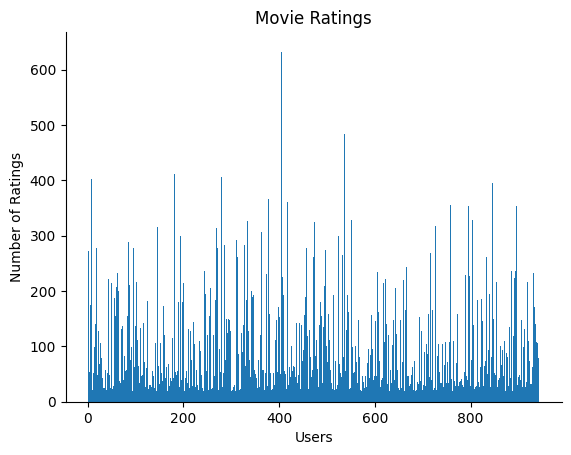

In [21]:
from matplotlib import pyplot as plt
ratings_df['user_id'].plot(kind='hist', bins=943, title='Movie Ratings')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel("Users")
plt.ylabel("Number of Ratings")

# Generating Embeddings for Movies

Using BERT to generate embedding for movives. We give movie plots and movie genres to generate an embedding.

In [22]:
import numpy as np
import torch
from sentence_transformers import SentenceTransformer

# Pretrained sentence transformer BERT
model = SentenceTransformer('all-MiniLM-L6-v2')
with torch.no_grad():
    plot_embeddings = model.encode(movies_df['keywords'].tolist(), convert_to_tensor=True, show_progress_bar=True)
    plot_embeddings = plot_embeddings.cpu()

# Creating movie feature vector
movie_features = torch.tensor(plot_embeddings)

# Creating user feature vector (identity matrix)
user_features = torch.eye(len(ratings_test['user_id'].unique()))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/43 [00:00<?, ?it/s]

<ipython-input-22-56d85d5d92c8>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  movie_features = torch.tensor(plot_embeddings)


In [25]:
# Size of the movie embedding
print(f"Size of each movie embedding is: {len(movie_features[0])}")

Size of each movie embedding is: 384


In [26]:
# Size of the user embedding
print(f"user_features: {user_features.shape}")

user_features: torch.Size([943, 943])


In [27]:
# Mapping the user_id to a unique consecutive value
unique_user_id = ratings_df['user_id'].unique()
unique_user_id = pd.DataFrame(data={
    'user_id': unique_user_id,
    'mappedUserId': pd.RangeIndex(len(unique_user_id))
    })

print(f"unique_user_id length {len(unique_user_id)}")

unique_user_id length 943


In [28]:
# Mapping the movie_id to a unique consecutive value
unique_movie_id = ratings_df['movie_id'].unique()
unique_movie_id = pd.DataFrame(data={
    'movie_id': unique_movie_id,
    'mappedMovieId': pd.RangeIndex(len(unique_movie_id))
    })

print(f"{unique_movie_id}")
print(f"Length: {len(unique_movie_id)}")

      movie_id  mappedMovieId
0            1              0
1            2              1
2            3              2
3            4              3
4            5              4
...        ...            ...
1366      1268           1366
1367       361           1367
1368      1062           1368
1369      1294           1369
1370      1306           1370

[1371 rows x 2 columns]
Length: 1371


In [29]:
# Merging these ids to the original dataframe
ratings_df = ratings_df.merge(unique_user_id, on='user_id')
ratings_df = ratings_df.merge(unique_movie_id, on='movie_id')

In [30]:
ratings_df

,user_id,movie_id,rating,unix_timestamp,mappedUserId,mappedMovieId
0,1,1,5,874965758,0,0
1,2,1,4,888550871,1,0
2,5,1,4,875635748,4,0
3,6,1,4,883599478,5,0
4,10,1,4,877888877,9,0
...,...,...,...,...,...,...
98834,181,1370,1,878962550,180,1362
98835,655,1370,3,890887261,654,1362
98836,936,1370,4,886833571,935,1362
98837,181,1371,1,878962240,180,1363


# Selecting user to study later

In [31]:
# Selecting one user to study
user_0 = ratings_df[ratings_df["mappedUserId"] == 0]
user_0

,user_id,movie_id,rating,unix_timestamp,mappedUserId,mappedMovieId
0,1,1,5,874965758,0,0
452,1,2,3,876893171,0,1
583,1,3,4,878542960,0,2
673,1,4,3,876893119,0,3
882,1,5,3,889751712,0,4
...,...,...,...,...,...,...
41127,1,160,4,875072547,0,667
41196,1,171,5,889751711,0,510
41261,1,189,3,888732928,0,335
41327,1,202,5,875072442,0,428


In [32]:
# storing the ratings of user 0 to query the model after training
user_0_prefs= user_0[1:11]
user_0_prefs

,user_id,movie_id,rating,unix_timestamp,mappedUserId,mappedMovieId
452,1,2,3,876893171,0,1
583,1,3,4,878542960,0,2
673,1,4,3,876893119,0,3
882,1,5,3,889751712,0,4
968,1,6,5,887431973,0,5
994,1,7,4,875071561,0,6
1386,1,8,1,875072484,0,7
1605,1,9,5,878543541,0,8
1904,1,10,3,875693118,0,9
1993,1,11,2,875072262,0,10


In [33]:
# removing first 10 entries of user_0 from training data
for i in range(11):
  ratings_df.drop(ratings_df[(ratings_df['mappedUserId'] == 0) & (ratings_df['mappedMovieId'] == i)].index, inplace=True)


In [34]:
sorted= ratings_df.sort_values(by="mappedUserId")
sorted[0:100]

,user_id,movie_id,rating,unix_timestamp,mappedUserId,mappedMovieId
17274,1,127,5,874965706,0,122
20767,1,152,5,878542589,0,147
20849,1,153,3,876893230,0,148
21096,1,154,5,878543541,0,149
21270,1,156,4,874965556,0,150
...,...,...,...,...,...,...
37918,1,256,4,889751712,0,246
37658,1,253,5,874965970,0,243
37684,1,254,1,878541392,0,244
37257,1,250,4,874965706,0,240


In [35]:
# Checking if the entries were removed
ratings_df[(ratings_df['mappedUserId'] == 0) & (ratings_df['mappedMovieId'] == 1)]

,user_id,movie_id,rating,unix_timestamp,mappedUserId,mappedMovieId


In [36]:
ratings_df

,user_id,movie_id,rating,unix_timestamp,mappedUserId,mappedMovieId
1,2,1,4,888550871,1,0
2,5,1,4,875635748,4,0
3,6,1,4,883599478,5,0
4,10,1,4,877888877,9,0
5,13,1,3,882140487,12,0
...,...,...,...,...,...,...
98834,181,1370,1,878962550,180,1362
98835,655,1370,3,890887261,654,1362
98836,936,1370,4,886833571,935,1362
98837,181,1371,1,878962240,180,1363


In [37]:
# Creating a edge index representation to load the data into PyG graph
edge_index = torch.stack([ torch.tensor(ratings_df['mappedUserId'].values), torch.tensor(ratings_df['mappedMovieId'].values)], dim=0)

# edge_index matrix should have the shape [2, num_ratings]
print(f"{edge_index.shape}")

torch.Size([2, 98828])


In [38]:
torch.max(edge_index)

tensor(1370)

In [39]:
user_features.shape

torch.Size([943, 943])

In [40]:
movie_features.shape

torch.Size([1372, 384])

In [41]:
edge_index.shape

torch.Size([2, 98828])

## Creating a PyG graph with the data

In [42]:
import torch_geometric.transforms
from torch_geometric.data import HeteroData

# Heterogenous Graph (nodes: Users and Movies)
data = HeteroData()

# Adding user nodes
data['user'].x = user_features

# Adding the movie nodes:
data['movie'].x = movie_features

# Adding the edges( User --> Movie)
data['user', 'rates', 'movie'].edge_index = edge_index

# Rating Values
rating = torch.from_numpy(ratings_df['rating'].values).to(torch.float)
data['user', 'rates', 'movie'].edge_label = rating

# Adding reverse edges (Movie --> User)
data = torch_geometric.transforms.ToUndirected()(data)


# Removing reversed labels
del data['movie', 'rev_rates', 'user'].edge_label

assert data['user'].num_nodes == len(unique_user_id)
assert data['user', 'rates', 'movie'].num_edges == len(ratings_df)
assert data['movie'].num_features == 384

data

HeteroData(
  user={ x=[943, 943] },
  movie={ x=[1372, 384] },
  (user, rates, movie)={
    edge_index=[2, 98828],
    edge_label=[98828],
  },
  (movie, rev_rates, user)={ edge_index=[2, 98828] }
)

In [43]:
data.edge_items()[0]

(('user', 'rates', 'movie'),
 {'edge_index': tensor([[   1,    4,    5,  ...,  935,  180,  393],
         [   0,    0,    0,  ..., 1362, 1363, 1363]]), 'edge_label': tensor([4., 4., 4.,  ..., 4., 1., 2.])})

In [44]:
data.edge_items()[0][1].edge_index

tensor([[   1,    4,    5,  ...,  935,  180,  393],
        [   0,    0,    0,  ..., 1362, 1363, 1363]])

In [45]:
data.edge_items()[0][1].edge_label[0].item()

4.0

In [46]:
# User representation
data['user'].x

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [47]:
user_tensor = data['user'].x
type(user_tensor[0][0])
user_tensor[0][0]

tensor(1.)

In [48]:
# Movie representation
print(data['movie'].x)
print(data['movie'].x.shape)

tensor([[-0.0872, -0.0469,  0.0343,  ...,  0.0224, -0.0028,  0.0072],
        [-0.1485, -0.0017, -0.1368,  ..., -0.0825, -0.0668,  0.0187],
        [-0.1153,  0.0067, -0.0369,  ..., -0.0150, -0.0578, -0.0062],
        ...,
        [-0.0211, -0.0833,  0.0084,  ...,  0.0295,  0.0517, -0.0340],
        [-0.0619, -0.0702,  0.0278,  ..., -0.0238, -0.0115, -0.0585],
        [-0.1285, -0.1328,  0.0256,  ..., -0.0436, -0.0432, -0.0364]])
torch.Size([1372, 384])


# Creating Train, Validation and Test Splits

In [49]:
# Splitting the dataset
train_data, val_data, test_data = torch_geometric.transforms.RandomLinkSplit(
    num_val=0.2,
    num_test=0.1,
    neg_sampling_ratio=0.0,
    edge_types=[('user', 'rates', 'movie')],
    rev_edge_types=[('movie', 'rev_rates', 'user')],
)(data)
train_data, val_data, test_data

(HeteroData(
   user={ x=[943, 943] },
   movie={ x=[1372, 384] },
   (user, rates, movie)={
     edge_index=[2, 69181],
     edge_label=[69181],
     edge_label_index=[2, 69181],
   },
   (movie, rev_rates, user)={ edge_index=[2, 69181] }
 ),
 HeteroData(
   user={ x=[943, 943] },
   movie={ x=[1372, 384] },
   (user, rates, movie)={
     edge_index=[2, 69181],
     edge_label=[19765],
     edge_label_index=[2, 19765],
   },
   (movie, rev_rates, user)={ edge_index=[2, 69181] }
 ),
 HeteroData(
   user={ x=[943, 943] },
   movie={ x=[1372, 384] },
   (user, rates, movie)={
     edge_index=[2, 88946],
     edge_label=[9882],
     edge_label_index=[2, 9882],
   },
   (movie, rev_rates, user)={ edge_index=[2, 88946] }
 ))

# Defining the Model

The model has two parts. The encoder and the decoder. The encoder consists of the GNN, we have a basic architecture, two SAGEConv layers and a ReLU activation function. The decoder is where we predict the rating, we have two linear layers with ReLu activation function between them.

In [57]:
from torch_geometric.nn import SAGEConv, to_hetero

class GNNEncoder(torch.nn.Module):
    def __init__(self, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = SAGEConv((-1, -1), hidden_channels)
        self.conv2 = SAGEConv((-1, -1), out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return x


class Decoder(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.lin1 = torch.nn.Linear(2 * hidden_channels, hidden_channels)
        self.lin2 = torch.nn.Linear(hidden_channels, 1)

    def forward(self, z_dict, edge_label_index):
        row, col = edge_label_index
        z = torch.cat([z_dict['user'][row], z_dict['movie'][col]], dim=-1)

        z = self.lin1(z).relu()
        z = self.lin2(z)
        return z.view(-1)


class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        self.encoder = GNNEncoder(hidden_channels, hidden_channels)
        self.encoder = to_hetero(self.encoder, data.metadata(), aggr='sum')
        self.decoder = Decoder(hidden_channels)

    def forward(self, x_dict, edge_index_dict, edge_label_index):
        z_dict = self.encoder(x_dict, edge_index_dict)
        return self.decoder(z_dict, edge_label_index)


model = Model(hidden_channels=32).to(device)

print(model)

Model(
  (encoder): GraphModule(
    (conv1): ModuleDict(
      (user__rates__movie): SAGEConv((-1, -1), 32, aggr=mean)
      (movie__rev_rates__user): SAGEConv((-1, -1), 32, aggr=mean)
    )
    (conv2): ModuleDict(
      (user__rates__movie): SAGEConv((-1, -1), 32, aggr=mean)
      (movie__rev_rates__user): SAGEConv((-1, -1), 32, aggr=mean)
    )
  )
  (decoder): Decoder(
    (lin1): Linear(in_features=64, out_features=32, bias=True)
    (lin2): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [58]:
import torch.nn.functional as F

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train
def train():
    model.train()
    optimizer.zero_grad()
    pred = model(train_data.x_dict, train_data.edge_index_dict, train_data['user', 'movie'].edge_label_index)
    target = train_data['user', 'movie'].edge_label
    loss = F.mse_loss(pred, target)
    loss.backward()
    optimizer.step()
    return float(loss)

# Test
@torch.no_grad()
def test(data):
    data = data.to(device)
    model.eval()
    pred = model(data.x_dict, data.edge_index_dict, data['user', 'movie'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    target = data['user', 'movie'].edge_label.float()
    loss = F.mse_loss(pred, target)
    rmse = loss.sqrt()
    return float(rmse)

# Training the model
total_loss = []
for epoch in range(1, 301):
    train_data = train_data.to(device)
    loss = train()
    total_loss.append(loss)
    train_rmse = test(train_data)
    val_rmse = test(val_data)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_rmse:.4f}, '
          f'Val: {val_rmse:.4f}')


Epoch: 001, Loss: 15.0483, Train: 3.7145, Val: 3.6977
Epoch: 002, Loss: 13.8894, Train: 3.4931, Val: 3.4766
Epoch: 003, Loss: 12.2015, Train: 3.0976, Val: 3.0817
Epoch: 004, Loss: 9.5952, Train: 2.4232, Val: 2.4088
Epoch: 005, Loss: 5.8719, Train: 1.4390, Val: 1.4314
Epoch: 006, Loss: 2.0707, Train: 1.5672, Val: 1.5838
Epoch: 007, Loss: 2.4562, Train: 1.8393, Val: 1.8577
Epoch: 008, Loss: 5.0784, Train: 1.7452, Val: 1.7637
Epoch: 009, Loss: 3.0721, Train: 1.1866, Val: 1.1978
Epoch: 010, Loss: 1.4081, Train: 1.2056, Val: 1.2039
Epoch: 011, Loss: 1.4534, Train: 1.4832, Val: 1.4751
Epoch: 012, Loss: 2.1999, Train: 1.6646, Val: 1.6544
Epoch: 013, Loss: 2.7708, Train: 1.7007, Val: 1.6902
Epoch: 014, Loss: 2.8924, Train: 1.6118, Val: 1.6021
Epoch: 015, Loss: 2.5978, Train: 1.4305, Val: 1.4233
Epoch: 016, Loss: 2.0465, Train: 1.2207, Val: 1.2185
Epoch: 017, Loss: 1.4901, Train: 1.1120, Val: 1.1178
Epoch: 018, Loss: 1.2365, Train: 1.2098, Val: 1.2228
Epoch: 019, Loss: 1.4635, Train: 1.3794, Va

15.048286437988281


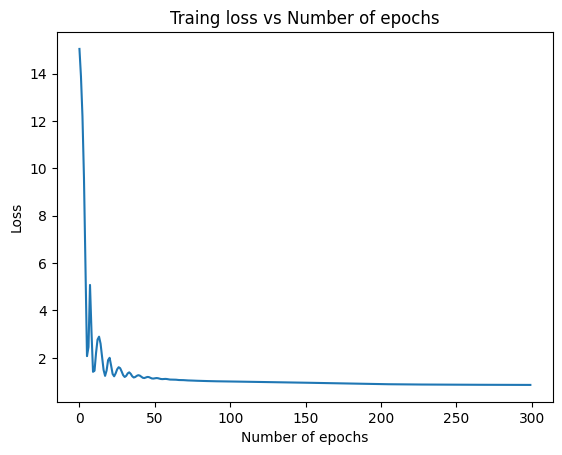

In [59]:

from matplotlib import pyplot as plt

epochs = [x for x in range(300)]
len(epochs)

plt.plot(epochs, total_loss, label="train loss")
plt.title("Traing loss vs Number of epochs")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

print(max(total_loss))

## Evaluating the model

In [60]:
# Model Evaluation
with torch.no_grad():
    test_data = test_data.to(device)
    pred = model(test_data.x_dict, test_data.edge_index_dict,
                 test_data['user', 'movie'].edge_label_index)
    pred = pred.clamp(min=0, max=5)
    target = test_data['user', 'movie'].edge_label.float()
    loss = F.mse_loss(pred, target)
    rmse = loss.sqrt()
    print(f'Test RMSE: {rmse:.4f}')

userId = test_data['user', 'movie'].edge_label_index[0].cpu().numpy()
movieId = test_data['user', 'movie'].edge_label_index[1].cpu().numpy()
pred = pred.cpu().numpy()
target = target.cpu().numpy()

print(pd.DataFrame({'userId': userId, 'movieId': movieId, 'rating': pred, 'target': target}))

Test RMSE: 0.9400
      userId  movieId    rating  target
0        307      452  4.178226     4.0
1        221      194  3.587215     5.0
2        331     1144  3.623976     4.0
3        515      635  3.691550     5.0
4        727      272  4.292249     4.0
...      ...      ...       ...     ...
9877     649      375  2.947912     3.0
9878     397      375  3.223750     4.0
9879      44      814  3.170168     4.0
9880      96       75  4.245807     5.0
9881     773      352  2.069198     2.0

[9882 rows x 4 columns]



## Querying the model

In [61]:
# User we want to predict for
mapped_user_id = 0


In [62]:
edge_label_index = torch.tensor([
    mapped_user_id,
   4])

with torch.no_grad():
    test_data.to(device)
    pred = model(test_data.x_dict, test_data.edge_index_dict, edge_label_index)
    pred = pred.clamp(min=0, max=5).detach().cpu().numpy()

In [63]:
pred.item()

3.1450023651123047